# Introduction

This project is looking at data from OKCupid. OKCupid is an online dating website and application internationally operated. The data consists of user profile infomation. 

The goal of this project is to scope, analyze, and prepare the data for a machine learning model to answer a question.

## Project objective

The goal of this project is to establish if an OKCupid user's astrological sign can be predicted given other variables in their profiles. Many OKCupid users find astrology an important factor in finding matches. If a user doesn't put in their sign, OKCupid may want a way to predict what their sign might be. 

With user's date of birth not included in profiles, Can a user's astrological sign be predicted using other variables from the user's profile?  

## Data

This project has one dataset, "profiles.csv", provided by Codecademy.com. Each row represents a user from OKCupid with each column represents a response to multiple choice or short-answer questions.

This project will use data visualization to better understand distribution and count between each variable.
After exploring the data, it will be cleaned and prepared for two models, Decision Tree and KNeighbors. Both are supervised machine learning classification models. 
Lastly, the models will be evaluated using a confusion matrix and evaluation metrics such as accuracy, precision, recall, and f1 score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Exploring the data

Taking "profiles.csv" and putting it into a Dataframe called "Profiles" and looking at the first five rows.
Just looking at the first five rows, it appears that there are missing values in the data.

In [2]:
profiles = pd.read_csv(r'C:\Users\Cedric\Documents\profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Profiles has 59,946 rows with 31 columns.
Essay0-9 columns consist of open short-answer responds. These columns are outside the scope of this project.

In [3]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

## Columns

### Age

Age distribution of users broken down by sex. The majority of users appear to be between mid 20s to mid 30s. The distribution of age between males and females are very similar. This also shows there are considerably more males than females. 

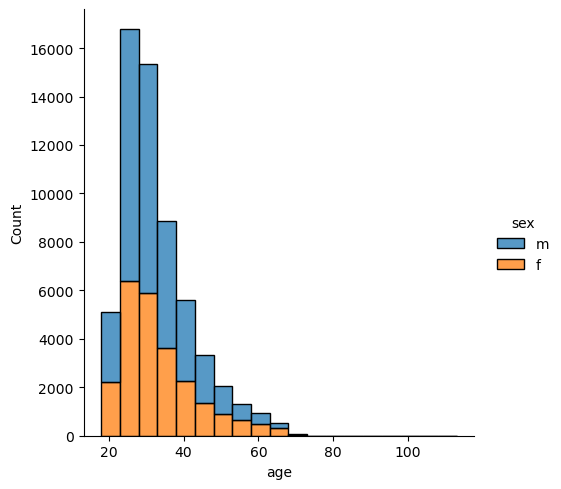

In [4]:
sns.displot(data = profiles, x = 'age', hue = 'sex', binwidth = 5, multiple = 'stack');

### Height

Distribution of height. Normal distribution ranging from 5ft to 6'5 with a few outliers. Majority of users being 5'8 to 6'1. 

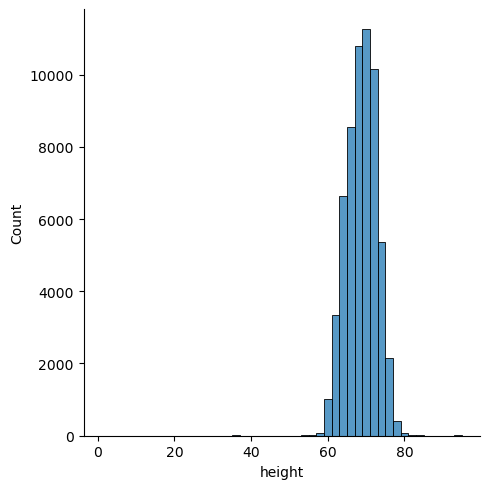

In [5]:
sns.displot(data = profiles, x = 'height', binwidth = 2);

### Income

Here is a graph of user income. It appears most users chose not to input their income. 

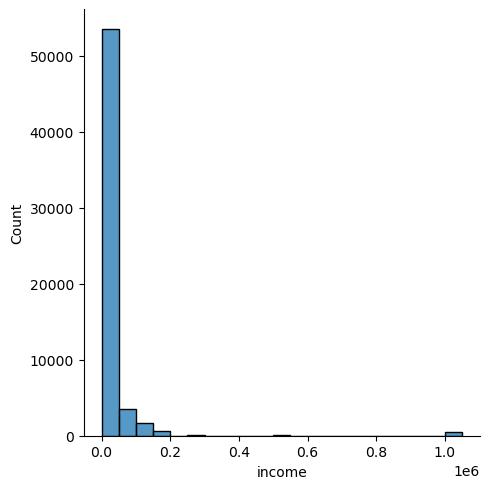

In [6]:
sns.displot(data = profiles, x = 'income', binwidth = 50000);

### Sex

This graph shows the count between males and females. As what was mentioned earlier, there are more males than females in this data with ~36,000 males to ~24,000

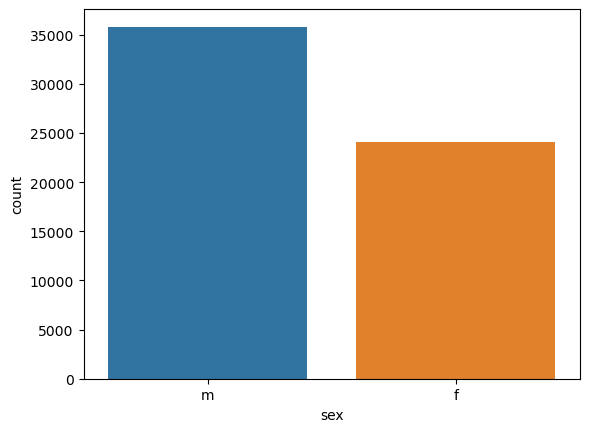

In [7]:
sns.countplot(data = profiles, x = 'sex');

### Body type

This graph shows the count for the different body types users have. Most users describing themselves as average, fit, or athletic.

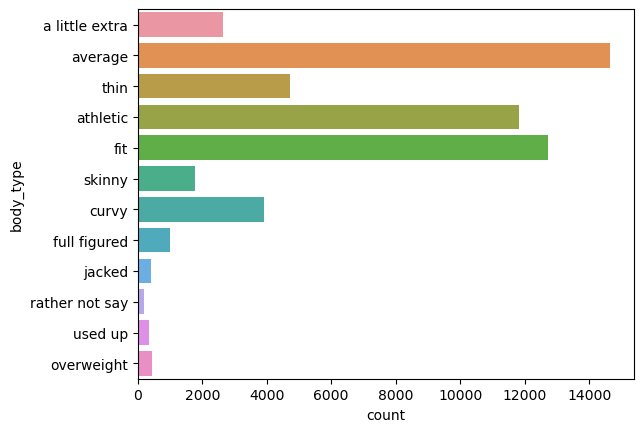

In [8]:
sns.countplot(data = profiles, y = 'body_type');

### Diet

A count of the different diets users have. With a big majority of users having a "mostly anything" diet.

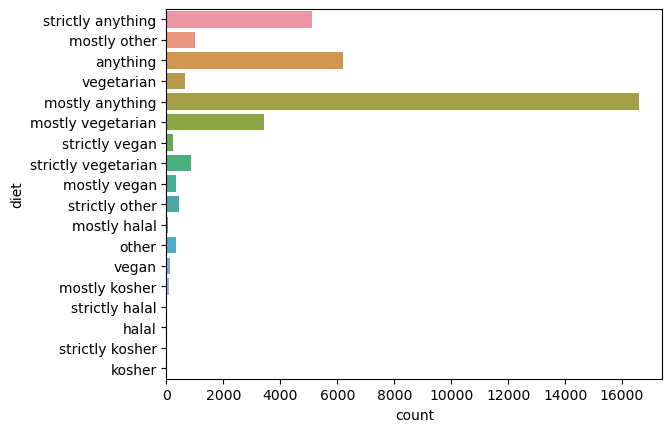

In [9]:
sns.countplot(data = profiles, y = 'diet');

### Drinks

Here is graph showing user drinking habits. Most users only drink socially

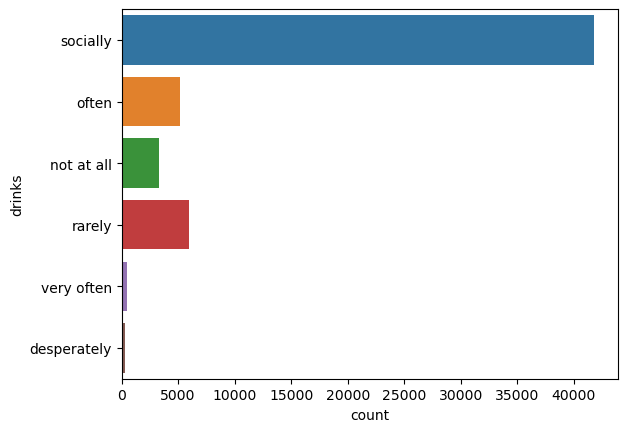

In [10]:
sns.countplot(data = profiles, y = 'drinks');     

### Drugs

User's drug habits. Majority of users never done drugs

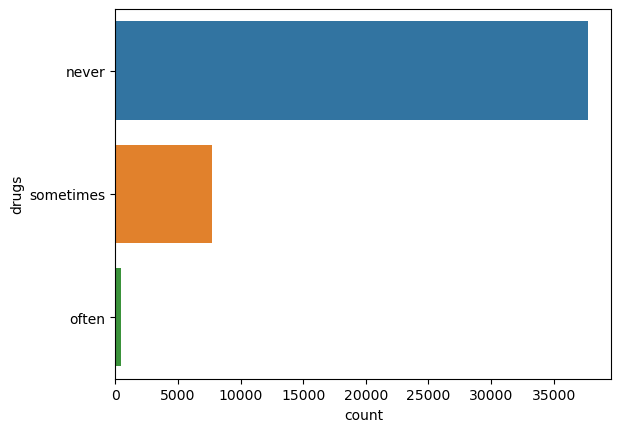

In [11]:
sns.countplot(data = profiles, y = 'drugs');

### Education

Here is a graph showing user's highest level of education. Most users have either graduated from college/university, graduated from masters program, or is working on college/university.

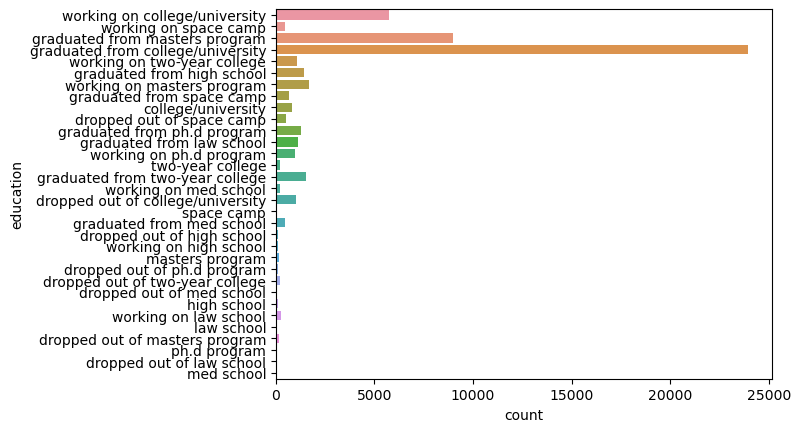

In [12]:
sns.countplot(data = profiles, y = 'education');

### Job

A count of the different jobs users have. With most users putting down other, followed by student, science/tech/engineering, and computer/hardware/software.

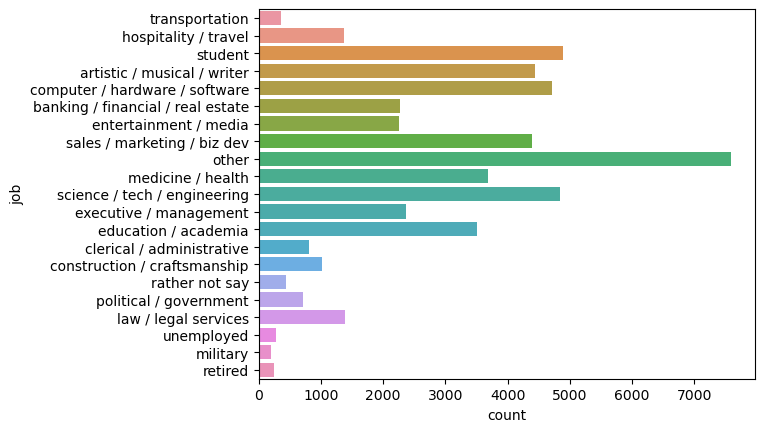

In [13]:
sns.countplot(data = profiles, y = 'job');

### Offspring

A graph of user offspring status. It seems most of the users don't have offspring. 

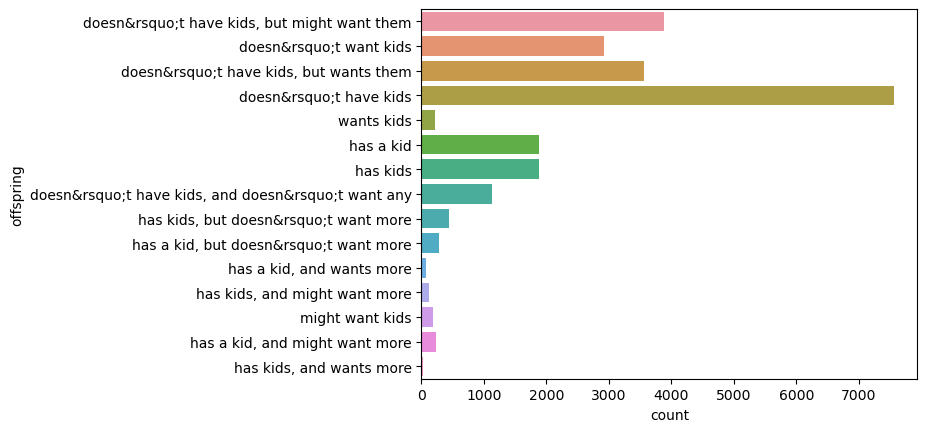

In [14]:
sns.countplot(data = profiles, y = 'offspring');

### Orientation

User's sexual orientation. A vast majority of users are straight.

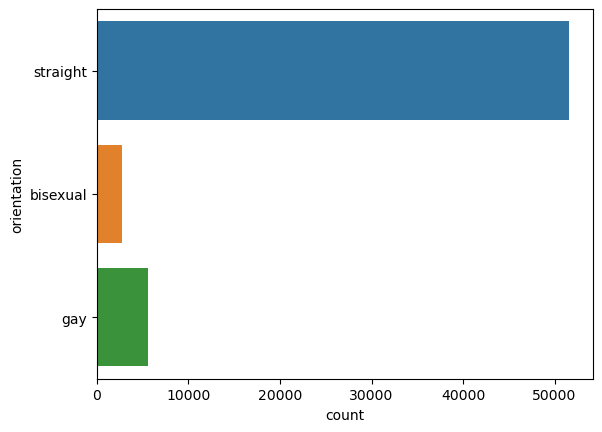

In [15]:
sns.countplot(data = profiles, y = 'orientation');

### Pets

A graph showing user's preferences between cats and dogs. It appears most user put "likes dogs and likes cats".

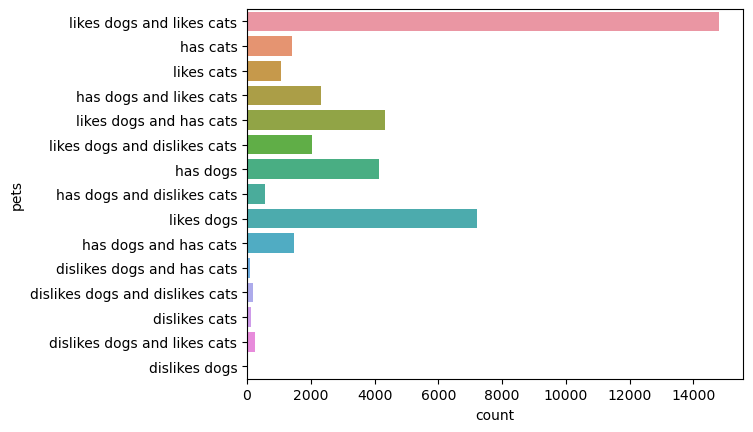

In [16]:
sns.countplot(data = profiles, y = 'pets');

### Religion

Here is a graph of the different religions users follow. There appear to be extra qualfiers put in with the religions.

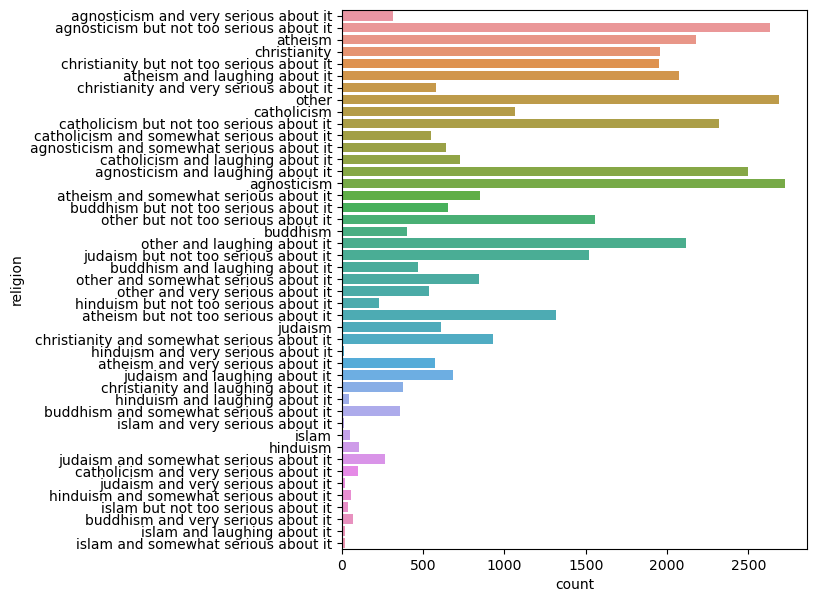

In [17]:
plt.figure(figsize=(6,7))
sns.countplot(data = profiles, y = 'religion');

By taking only the first word, religion has been cleaned to only have 9 groups and made it much easier to understand the distribution of religions. Looking at the graph it appears most users are not religious. Most put down agnosticism, other, and atheism.

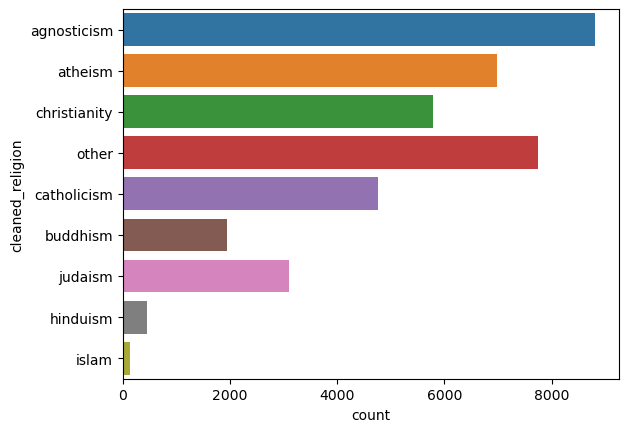

In [18]:
profiles['cleaned_religion'] = profiles.religion.str.split().str.get(0)
sns.countplot(data = profiles, y = 'cleaned_religion');

### Sign

User's astrological signs. It appears to have the same issue religions had with qualifiers added to each sign. The sign variable will be used as labels to be predicted in this project so its important to have it cleaned and ready for a model.

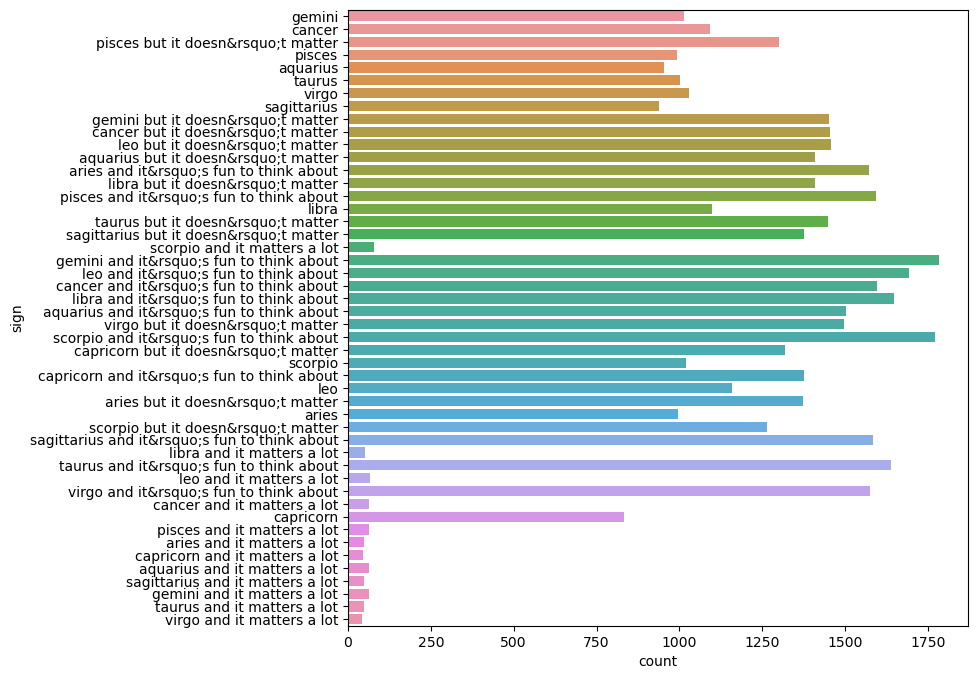

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(data = profiles, y = 'sign');

The first word was taken from each value just like the religion variable and reduced the groups down to the 12 astrological signs needed for labels. Looking at the cleaned data, the signs are fairly evenly distributed.

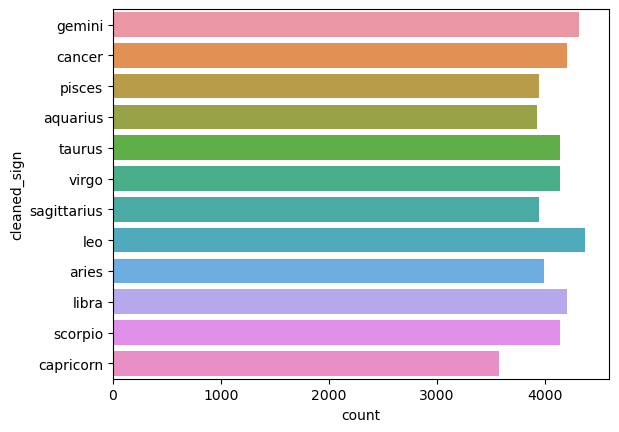

In [20]:
profiles['cleaned_sign'] = profiles.sign.str.split().str.get(0)
sns.countplot(data = profiles, y = 'cleaned_sign');

### Smokes

User's smoking habits. Vast majority of users do not smoke.

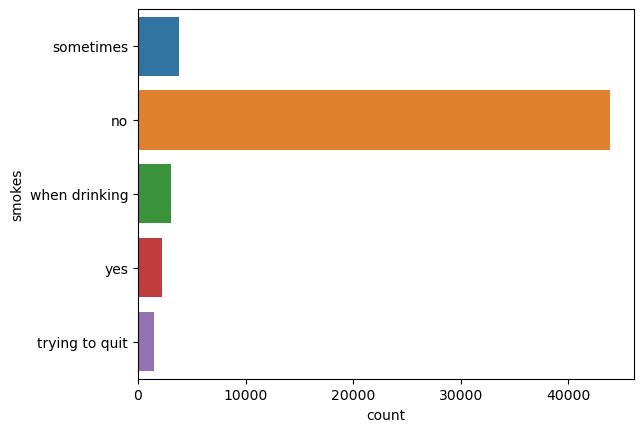

In [21]:
sns.countplot(data = profiles, y = 'smokes');

### Status

Relationship status of users. As expected, majority of users are single.

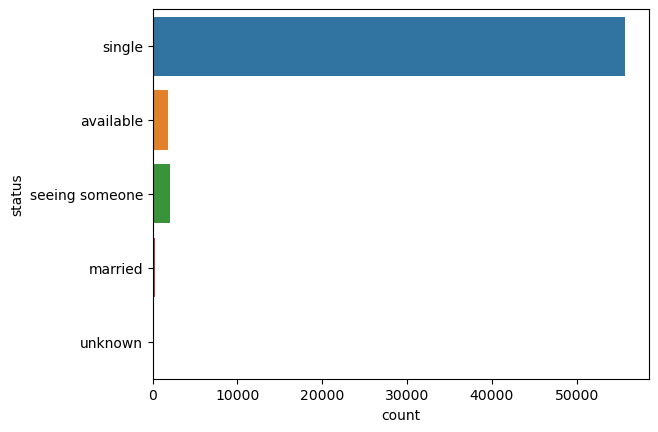

In [22]:
sns.countplot(data = profiles, y = 'status');

## Data Preparation

Next step after exploring the data is to prepare the data for a machine learning algorithm. First is to look into that missing values issue identified eailer.

### MIssing values

It appears that there is alot of missing values in this dataset. Unfortunately, the missing data can't be replaced so the rows with missing data will have to be dropped.

In [23]:
profiles.isnull().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
cleaned_religion    20226
cleaned_sign        11056
dtype: int64

### preprocessing 

Next is feature selection and dropping missing data. The data used to train the model will be a subset of variables. The variables chosen where thought to be good predictors for a user's sign. Variables like "age" or "income" are not good predictors. 

In [24]:
features = ['body_type', 'offspring', 'pets', 'diet', 'education', 'job', 'cleaned_religion', 'cleaned_sign'] 

df = profiles[features].dropna()
df.shape

(9186, 8)

Here the selected features are given dummy variables. Since the features are categorical, dummy variables are used to give the features a binary identifier, which is better for the model to read. 7 columns used as features now turns to 121.

In [25]:
for feature in features[:-1]:
    df = pd.get_dummies(df, columns = [feature], prefix = [feature])
df.head()

,cleaned_sign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_unemployed,cleaned_religion_agnosticism,cleaned_religion_atheism,cleaned_religion_buddhism,cleaned_religion_catholicism,cleaned_religion_christianity,cleaned_religion_hinduism,cleaned_religion_islam,cleaned_religion_judaism,cleaned_religion_other
0,gemini,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,taurus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Finally, the data is split into a trainset to train the model and a testset to test predictions.

In [138]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 41)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Predictions

### Decision Tree

The first model is ready to be trained. First will be the decision tree classifier.

In [139]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train);

### Evaluation

After the model is trained, the next step is to make a prediction and evaluate the model. 
A short description of the evaluation metrics being used:

- **Accuracy** is True Positives and True Negatives divided by total values
- **Precision** is True Positives divided by True Positives and False Negatives
- **Recall** is True Positives divided by the True Positives and False Positives
- **F1-score** is a blended score of precision and recall
- **Macro Avg** is the unweighted mean value of precision and recall
- **Weighted Avg** is the weighted mean value of preision and recall by the support values for each class
- **Support** is the number of observations in class to predict

Here a prediction is made on the train data and "classification_report" is used to evaluate the prediction.
Using default hyperparameters for the decision tree, the model got ~97% score on the training data which is a good sign. 

In [168]:
from sklearn.metrics import classification_report, confusion_matrix
dtree_train_pred = dtree.predict(x_train)

print(classification_report(y_train, dtree_train_pred))


              precision    recall  f1-score   support

    aquarius       0.91      1.00      0.95       555
       aries       0.93      0.99      0.96       594
      cancer       0.96      0.98      0.97       638
   capricorn       0.95      0.98      0.96       530
      gemini       0.96      0.96      0.96       667
         leo       0.97      0.96      0.97       675
       libra       0.98      0.97      0.97       603
      pisces       0.97      0.95      0.96       615
 sagittarius       0.99      0.94      0.97       610
     scorpio       0.99      0.96      0.97       625
      taurus       1.00      0.96      0.98       595
       virgo       1.00      0.95      0.97       641

    accuracy                           0.97      7348
   macro avg       0.97      0.97      0.97      7348
weighted avg       0.97      0.97      0.97      7348



Here is the evaluation of the test data. This will show how well the model performs with new data. scoring on the test data is ~10% which not good. With the training data scoring high and the testing data scoring low suggests the model is overfit to the data. 

In [169]:
dtree_test_pred = dtree.predict(x_test)

print(classification_report(y_test, dtree_test_pred))

              precision    recall  f1-score   support

    aquarius       0.08      0.09      0.08       140
       aries       0.06      0.06      0.06       143
      cancer       0.10      0.09      0.10       183
   capricorn       0.12      0.13      0.12       141
      gemini       0.14      0.12      0.13       190
         leo       0.13      0.12      0.12       181
       libra       0.12      0.11      0.11       151
      pisces       0.11      0.12      0.12       136
 sagittarius       0.08      0.08      0.08       134
     scorpio       0.07      0.08      0.08       144
      taurus       0.05      0.05      0.05       141
       virgo       0.10      0.10      0.10       154

    accuracy                           0.10      1838
   macro avg       0.10      0.10      0.10      1838
weighted avg       0.10      0.10      0.10      1838



Below is a heat map of the confusion matrix. True values on the y axis and predicted values on the axis. Based off the heat map, gemini, leo, and cancer were predicted most often with most of the signs not to far behind. The low count suggests low accuracy.   

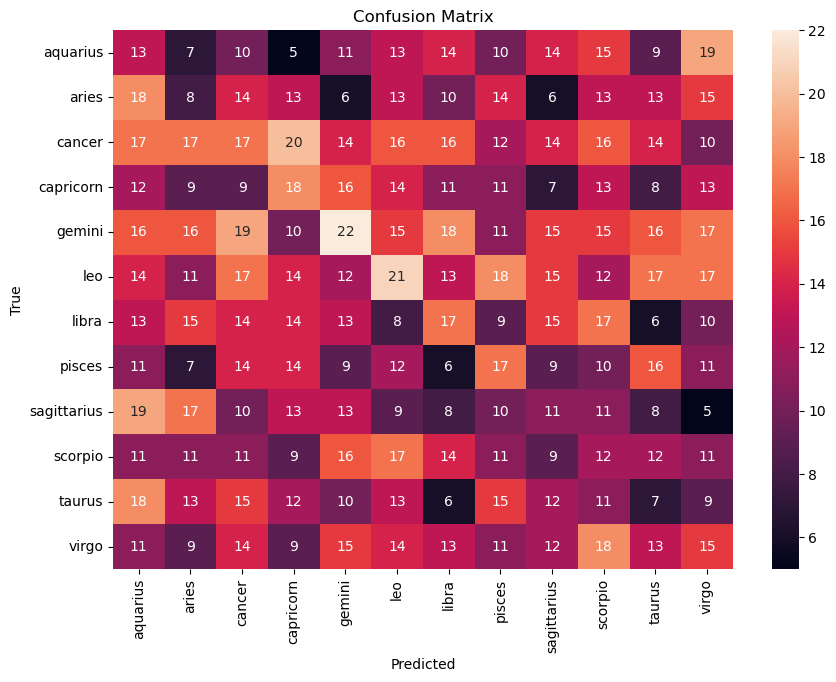

In [178]:
dtree_cm = confusion_matrix(y_test, dtree_test_pred)
dtree_labels = dtree.classes_

plt.figure(figsize = (10, 7))
ax = plt.subplot()
sns.heatmap(dtree_cm, annot = True, ax = ax, fmt = "d");

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(dtree_labels);
ax.yaxis.set_ticklabels(dtree_labels);
ax.xaxis.set_tick_params(rotation = 90)
ax.yaxis.set_tick_params(rotation = 360)

### KNeighbors

Next model to try is KNeighbors. KNeighbors has a default value of 5 for the hyperparameter "n_neighbors".
Train score for this model is ~35% which is considerably lower than the decision tree training score.

In [174]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
kn_train_pred = kn.predict(x_train)

print(classification_report(y_train, kn_train_pred))

              precision    recall  f1-score   support

    aquarius       0.26      0.65      0.37       555
       aries       0.28      0.56      0.37       594
      cancer       0.32      0.44      0.37       638
   capricorn       0.33      0.33      0.33       530
      gemini       0.40      0.38      0.39       667
         leo       0.43      0.31      0.36       675
       libra       0.40      0.25      0.31       603
      pisces       0.42      0.27      0.33       615
 sagittarius       0.47      0.26      0.33       610
     scorpio       0.38      0.25      0.30       625
      taurus       0.47      0.26      0.33       595
       virgo       0.44      0.24      0.32       641

    accuracy                           0.35      7348
   macro avg       0.38      0.35      0.34      7348
weighted avg       0.39      0.35      0.34      7348



Same with the previous model, KNeighbors does not score well on test data. Scoring ~9%.

In [175]:
kn_test_pred = kn.predict(x_test)

print(classification_report(y_test, kn_test_pred))

              precision    recall  f1-score   support

    aquarius       0.09      0.25      0.13       140
       aries       0.06      0.13      0.08       143
      cancer       0.09      0.11      0.10       183
   capricorn       0.09      0.09      0.09       141
      gemini       0.13      0.09      0.11       190
         leo       0.13      0.09      0.11       181
       libra       0.08      0.05      0.06       151
      pisces       0.06      0.04      0.05       136
 sagittarius       0.05      0.03      0.04       134
     scorpio       0.08      0.06      0.07       144
      taurus       0.01      0.01      0.01       141
       virgo       0.18      0.09      0.12       154

    accuracy                           0.09      1838
   macro avg       0.09      0.09      0.08      1838
weighted avg       0.09      0.09      0.08      1838



The heat map for KNeighbors confusion matrix shows gemini, leo, cancer, aries, and aquarius predicted most often, but the rest of the map suggesting low accuracy. 

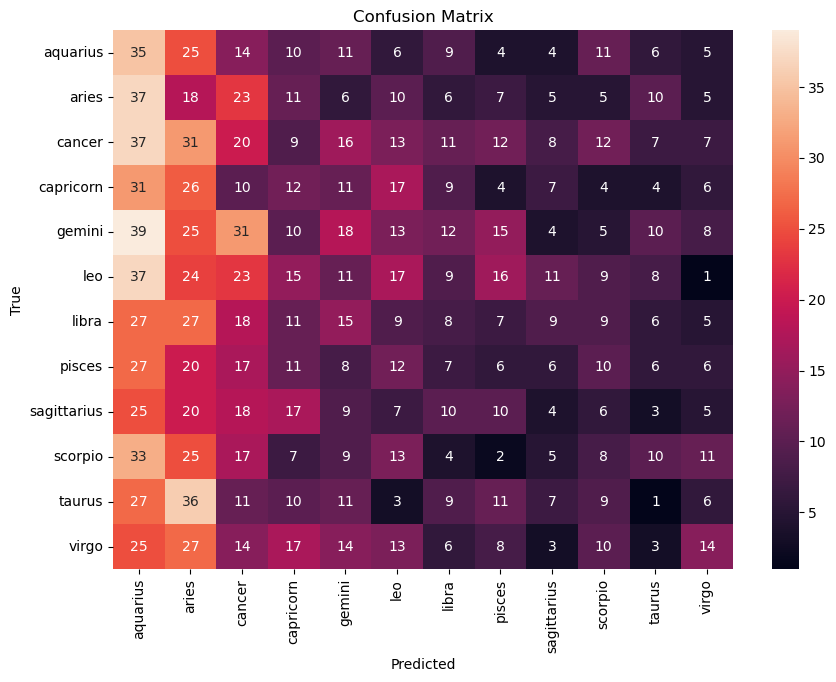

In [177]:
kn_cm = confusion_matrix(y_test, kn_test_pred)
kn_labels = kn.classes_

plt.figure(figsize = (10, 7))
ax = plt.subplot()
sns.heatmap(kn_cm, annot = True, ax = ax, fmt = "d");

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(kn_labels);
ax.yaxis.set_ticklabels(kn_labels);
ax.xaxis.set_tick_params(rotation = 90)
ax.yaxis.set_tick_params(rotation = 360)

### Hyperparameter tuning

Given how poorly the two models performed on test data, perhaps tuning the hyperparameters could help boost performance. GridSearchCV will be used to iterate through different values of the hyperparameters of the Decision Tree model to find the best accuracy score. The hyperparameters to be tuned are criterion and max depth. Criterion has two input options: "gini" and "entropy" which measures the quality of a split in a tree. Max depth is the maximum depth of the tree which GridSearchCV will iterate through depths ranging from 5 to 30.

After fitting GridSearchCV to the training data, the best parameters found were "gini" for criterion and a max depth of 6.

In [158]:
from sklearn.model_selection import GridSearchCV
depth = range(5,31)
param_grid = {'max_depth': depth, 'criterion': ['gini', 'entropy']}
gs = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'accuracy')
gs.fit(x_train, y_train)
gs.best_params_

{'criterion': 'gini', 'max_depth': 6}

Even after tuning hyperparameters, the model still gets a score of ~9% accuracy and even performs worst with predicting other signs.

In [162]:
gs_dtree = DecisionTreeClassifier(max_depth = 6, criterion = 'gini')
gs_dtree.fit(x_train, y_train)

gs_dtree_pred = gs_dtree.predict(x_test)

print(classification_report(y_test, gs_dtree_pred))

              precision    recall  f1-score   support

    aquarius       1.00      0.01      0.01       140
       aries       0.00      0.00      0.00       143
      cancer       0.20      0.01      0.01       183
   capricorn       0.67      0.01      0.03       141
      gemini       0.07      0.04      0.05       190
         leo       0.10      0.88      0.17       181
       libra       0.00      0.00      0.00       151
      pisces       0.00      0.00      0.00       136
 sagittarius       0.04      0.01      0.02       134
     scorpio       0.00      0.00      0.00       144
      taurus       0.00      0.00      0.00       141
       virgo       0.00      0.00      0.00       154

    accuracy                           0.09      1838
   macro avg       0.17      0.08      0.02      1838
weighted avg       0.17      0.09      0.03      1838



# Conclusion

In this project, machine learning was used to predict the astrological signs of users of the dating app OKCupid. Many people believe in astrology and the compatibility between signs. If a user fails to put in their sign, a machine learning model could be used to predict their sign based off other infomation in their profile.

Unfortunately, a model was unable to accurately predict a users astrological sign.

Next steps would be to consider if it is possible to predict a person's astrology sign at all, short of getting the person's birth date, or if more data about users would make it possible. 